In [2]:
import numpy as np

## Multidimensional Arrays with Numpy


Numpy arrays can be multidimensional: they can be squares, cubes, hypercubes, etc!  When choosing datastructures, Arrays are best chosen when all of the values in the structure represent the same variable.

With multidimensional arrays, everything is pretty much the same as the 1-dimensional case, with the addition of a few options for specifiying which order the dimensions should be in, and which dimension an operation should operate on.

In [3]:

x = np.random.randint(1, 10, size=(2, 3, 4))
x.size
x.dtype

dtype('int64')

In [4]:
x = np.arange(12).reshape(3, -1)
x[:2, 2:4]

array([[2, 3],
       [6, 7]])

### Creating Multidimensional Arrays

Most of the array-generation functions have a **shape** or **size** optional argument in them.  If you provide a tuple with a new shape specifying the number of elements along each dimension (e.g. (5, 3) will produce a matrix with 5 rows and 3 columns), it will give you something multidimensional!

```python
>>> data = np.random.randint(1, 10, size=(4, 5))
>>> data
array([[9, 7, 4, 2, 3],
       [3, 6, 7, 4, 8],
       [3, 6, 8, 7, 3],
       [6, 9, 4, 2, 2]])
```

For cases where there is no such option, all arrays have a **reshape()** method that lets you take an existing array and make it more-dimensional.  To simply **flatten** the matrix to a single dimension, you can use the **flatten()** method.

```python
>>> data.reshape(2, 10)
array([[9, 7, 4, 2, 3, 3, 6, 7, 4, 8],
       [3, 6, 8, 7, 3, 6, 9, 4, 2, 2]])

>>> data.flatten()
array([9, 7, 4, 2, 3, 3, 6, 7, 4, 8, 3, 6, 8, 7, 3, 6, 9, 4, 2, 2])
```

Numpy also has some auto-calculation features to make it a bit easier to get the shape you need:

```python
>>> data.reshape(-1, 5)  # -1 tells the reshape() method to calculate the value in that spot
array([[9, 7, 4, 2, 3],
       [3, 6, 7, 4, 8],
       [3, 6, 8, 7, 3],
       [6, 9, 4, 2, 2]])

>>> data.flatten()[np.newaxis, :]  # Makes a 1xN array
>>> data.flatten()[None, :]  # Also Makes a 1xN array
>>> data.flatten()[:, None]  # Makes an Nx1 array
```

And if an array has some extra dimensions you don't care about (like a 32x1x1 array, and you just want a 32 array), you can use the **squeeze()** method to squeeze out those extra dimensions!

Finally, you can find out the shape of a matrix by getting its **shape** attribute.  And to get the total number of elements, check its **size** attribute.

```python
>>> data.shape
(4, 5)

>>> data.size
20
```

**Exercises**

Generate a 3 x 10 array of random integers between 1 and 4 using **`np.random.randint`**

In [5]:
np.random.randint(1, 4, size=(3, 10))

array([[1, 2, 3, 2, 3, 1, 1, 2, 3, 3],
       [1, 3, 3, 2, 2, 1, 1, 1, 1, 2],
       [2, 1, 1, 2, 3, 3, 2, 1, 2, 1]])

Make a flat array with all the values between 0 and 11, and then reshape it into a 3 x 4 matrix using **`array.reshape()`**

In [7]:
# 3x4 array of 0 to 11 
x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

...Reshape the previous array into a 4 x 3 matrix...

In [8]:
x.reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

...Reshape that array into a 2 x 6 matrix...

In [9]:
x.reshape(2, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

...Then flatten it.

In [10]:
x.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Confirm its shape.  Is it the same as its size?

In [15]:
x.shape, x.size

((3, 4), 12)

### Reordering Dimensions

There are many ways to transpose matrices:
  - array.T
  - array.transpose()
  - np.transpose(array)
  - array.swapaxes(0, 1)



**Exercises**
Use each of the four above transpose functions on the following array **x**.

In [16]:
x = np.arange(6).reshape(2, 3)
x

array([[0, 1, 2],
       [3, 4, 5]])

In [18]:
x.T

array([[0, 3],
       [1, 4],
       [2, 5]])

In [19]:
x.transpose()

array([[0, 3],
       [1, 4],
       [2, 5]])

In [20]:
np.transpose(x)

array([[0, 3],
       [1, 4],
       [2, 5]])

In [21]:
x.swapaxes(0, 1)

array([[0, 3],
       [1, 4],
       [2, 5]])

**Discussion**: Why might Numpy have so many options for the same transformation?  What's the benefit?

### Aggregating Across Axes

| Function | Method |
| :---  | :--- |
| `np.mean(x, axis=0)` | `x.mean(axis=0)` |
| `np.std(x, axis=0)`  | `x.std(axis=0)`  |
| `np.median(x, axis=0)` | *(No median method)* |

Almost all of the Numpy functions have an **axis** option, which lets you limit the operation to just that axis.  

For example, to get the mean of all columns:

```python
>>> array = np.arange(12).reshape(3, 4)
>>> array.mean(axis=0)
array([4., 5., 6., 7.])
```

And the mean of the rows:

```python
>>> array.mean(axis=1)
array([1.5, 5.5, 9.5])
```

Notice that the number of dimensions goes down by default whenever you aggregate across the axis.  If you'd like to keep the dimensions the same, you can also use the **keepdims=True** option:

```python
>>> array.mean(axis=1, keepdims=True)
array([[1.5],
       [5.5],
       [9.5]])
```

**Exercises**: Try it out for yourself, with the provided array `data`:

In [22]:
np.random.seed(42)
data = np.random.randint(0, 10, size=(5, 3)) * [1, 10, 100]
data

array([[  6,  30, 700],
       [  4,  60, 900],
       [  2,  60, 700],
       [  4,  30, 700],
       [  7,  20, 500]])

What is the mean of each column?

In [23]:
data.mean(axis=0)

array([  4.6,  40. , 700. ])

What is the standard deviation of each row?

In [24]:
data.std(axis=1)

array([321.64714967, 409.81730347, 316.25727923, 322.14420511,
       229.3996997 ])

What is the maximum of each column?

In [25]:
data.max(axis=0)

array([  7,  60, 900])

What is the mean of each column's median?

In [26]:
np.median(data, axis=0)

array([  4.,  30., 700.])

## Indexing Exercises

Numpy arrays work the same way as other sequences, but they can have multiple dimensions (rows, columns, etc) over which to index/slice the array.

```python
data = np.array([[0, 1, 2,  3],
                 [4, 5, 6,  7],
                 [8, 9, 10, 11]]
               )
second_row = data[1, :]
third_column = data[:, 2]
```

**Exercises**

Using the example dataset *scores*, select only the described elements from each list:

In [27]:
scores = np.arange(1, 49).reshape(6, 8)
scores

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40],
       [41, 42, 43, 44, 45, 46, 47, 48]])

**Example:** The first score in the 2nd row:

In [29]:
scores[1, 0]

9

The fourth score in the first row:

In [30]:
scores[0, 3]

4

the second score in the fifth row:

**Example**: The third-through-fifth columns:

In [31]:
scores[:, 2:5]

array([[ 3,  4,  5],
       [11, 12, 13],
       [19, 20, 21],
       [27, 28, 29],
       [35, 36, 37],
       [43, 44, 45]])

The first-through-fourth columns:

In [32]:
scores[:, 0:4]

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12],
       [17, 18, 19, 20],
       [25, 26, 27, 28],
       [33, 34, 35, 36],
       [41, 42, 43, 44]])

The second-through-fourth **rows**:

In [33]:
scores[1:4, :]

array([[ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32]])

The fourth row:

In [34]:
scores[3, :]

array([25, 26, 27, 28, 29, 30, 31, 32])

The 2nd through 5th score, in the 6th column:

In [35]:
scores[1:6, 5]

array([14, 22, 30, 38, 46])

**Example:** The rectangle inscribed by scores 19, 22, 35, and 38:

In [39]:
scores[2:5, 2:6]

array([[19, 20, 21, 22],
       [27, 28, 29, 30],
       [35, 36, 37, 38]])

The rectangle inscribed by scores 42, 44, 12, and 10:

*(Reminder: to go to the "end" in a slice, just leave out the end number, like in data[2:])*

In [41]:
scores[1:, 1:4]

array([[10, 11, 12],
       [18, 19, 20],
       [26, 27, 28],
       [34, 35, 36],
       [42, 43, 44]])

##### Setting New Values

For arrays, indexing can also be used to assign a new value.  Let's try it out, using the following pattern:

```python
data[0, :] = 10  # changes all values in the first row to 10
data
```

*Tip*: If you want to keep the original array unchanged, `copy()` it to a new variable and change the new array.

**Exercises**

Use the following array, `scores`, in the exercises below:

In [42]:
scores = np.arange(1, 49).reshape(6, 8)
scores

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40],
       [41, 42, 43, 44, 45, 46, 47, 48]])

**Example**: Change the 3rd column to all 88s:

In [44]:
new_scores = scores.copy()
new_scores[:, 2] = 10
new_scores

array([[ 1,  2, 10,  4,  5,  6,  7,  8],
       [ 9, 10, 10, 12, 13, 14, 15, 16],
       [17, 18, 10, 20, 21, 22, 23, 24],
       [25, 26, 10, 28, 29, 30, 31, 32],
       [33, 34, 10, 36, 37, 38, 39, 40],
       [41, 42, 10, 44, 45, 46, 47, 48]])

Change the 4th row to 0:

Change the 5th-7th columns to -1

Change the last score to 999:


## Working with Images

Image data is stored as a 3D matrix, storing the brightness of each pixel along 3 coordinates:

  0. Which row the pixel is in  (between 0 and the height of the image)
  1. Which column the pixel is in (betweeen 0 and the width of the image)
  2. What color channel the pixel is in (red, green, blue, and sometimes alpha)

White pixels usually have the highest brightness values, and black pixels the darkest.

If you zoom in enough, you can see the square grid.  For example:

![Pixelated image](https://www.pinclipart.com/picdir/middle/531-5317564_heart-pixel-art-8-bit-heart-png-clipart.png)


This means that visualizing any image in Python can be done by "plotting" a matrix!  
Let's load an image and visualize it onscreen using Matplotlib, a plotting library.  Working with images generally uses these 3 functions:

| Function | Purpose  | Example |
| :----:   | :----:   | :---:   |
| **`plt.imread()`** | Loads a image from a filename  | plt.imread("brian.png" |
| **`plt.imshow()`** | Plots a multidimensional array as an image | plt.imshow(my_image_array) |
| **`plt.imsave()`** | Saves an array as an image on the computer | plt.imsave("new_image.jpg", my_array) |



Let's try it out!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Exercises**

**Example**: Plot the following matrix as an image.  What does it look like?

In [3]:
data = np.arange(100).reshape(10, 10)
data.shape  # could also just print the whole array, but often the array is too large

(10, 10)

Example:

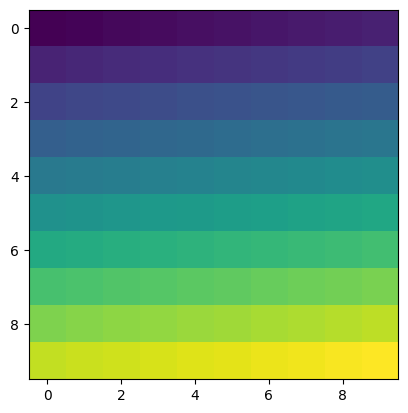

In [4]:
plt.imshow(data);

Plot the following matrix.  What does it look like?

*Tip*: After plotting, try adding the following to the `plt.imshow()` function: `cmap='gray'`

In [5]:
data = np.tile(np.sin(np.linspace(0, 6 * np.pi, 300)), (300, 1))

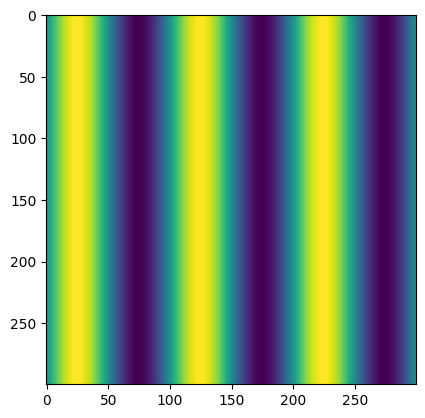

In [6]:
plt.imshow(data);

Example: Read and Plot the Skull image in the `images`` folder.

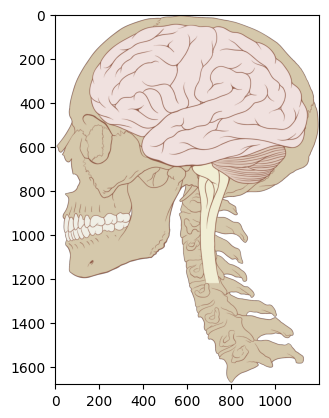

In [7]:
im = plt.imread('images/skull.png')
plt.imshow(im);

Read and plot the "Monty Python" image in the images folder:

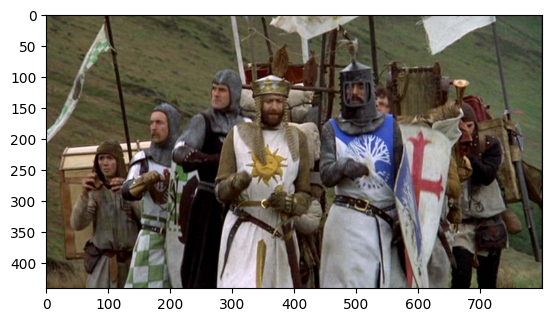

In [8]:
im = plt.imread('images/montypython.jpg')
plt.imshow(im);

Read and plot the "Cells" image in the images folder.

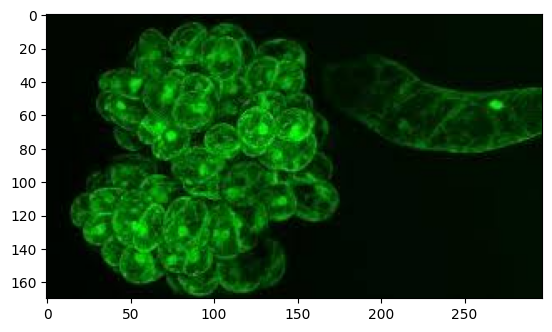

In [9]:
im = plt.imread('images/cells.jpg')
plt.imshow(im);

**Example**: Using the Cells image, index only the first 50 rows of the image and plot it, then save it as "top_part.png".  (This is called "cropping" an image)

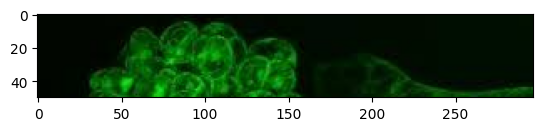

In [10]:
cropped = im[:50, :]
plt.imshow(cropped);
plt.imsave("top_part.png", cropped)

Crop and Plot only the left cluster of cells, then save the image as "left_cluster.png".

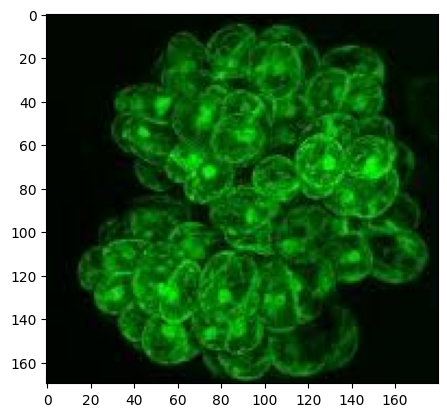

In [11]:
cropped = im[:, :180]
plt.imshow(cropped);
plt.imsave('left_cluster.ignore.png', cropped)

Crop and Plot only the right cluster of cells, then save the image as "right_cluster.png".

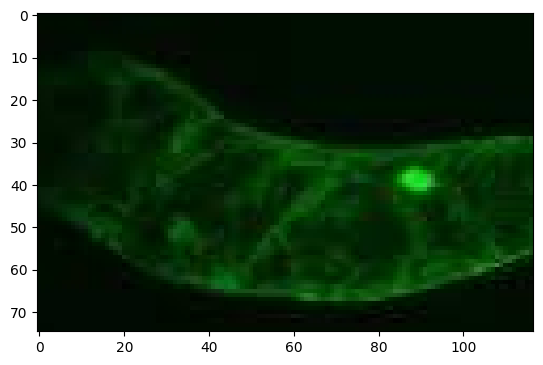

In [12]:
cropped = im[15:90, 180:]
plt.imshow(cropped);
plt.imsave("right_cluster.ignore.png", cropped)

Load the Brains image and show it (should see a picture with lots of different brains)

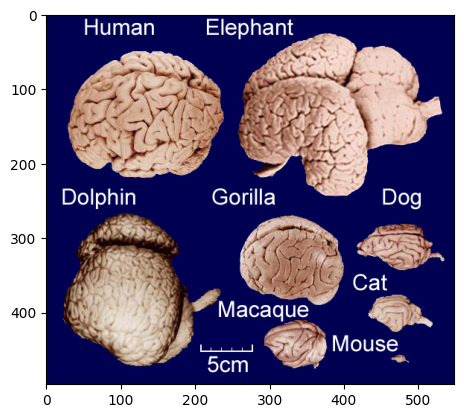

In [13]:
im = plt.imread("images/Brains.jpg")
plt.imshow(im);

Crop the human brain (only the brain, no labels), show it, and save it to a file called "brain_human.png".

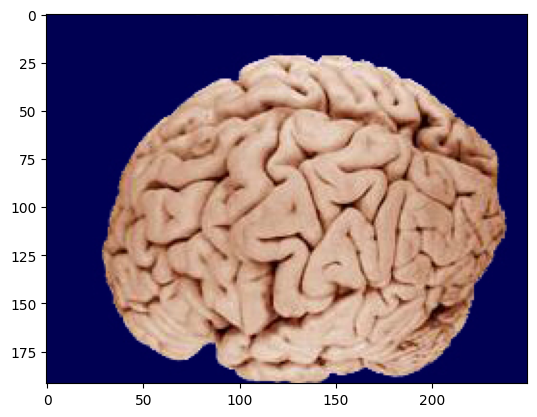

In [14]:
cropped = im[28:220, 0:250]
plt.imshow(cropped);
plt.imsave("brain_human.ignore.png", cropped)


**Example**: Crop out the gorilla brain, and make any text you couldn't crop out the same color as the background (Tip: copy the image before changing it).  When you are satisfied with the picture, save it to "brain_gorilla.png"

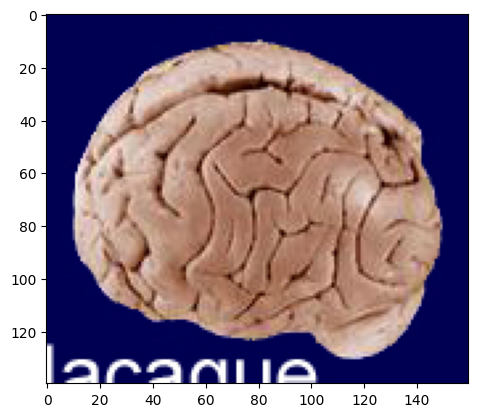

In [15]:
cropped = im[260:400, 250:410].copy()
plt.imshow(cropped);

Example: changing the color

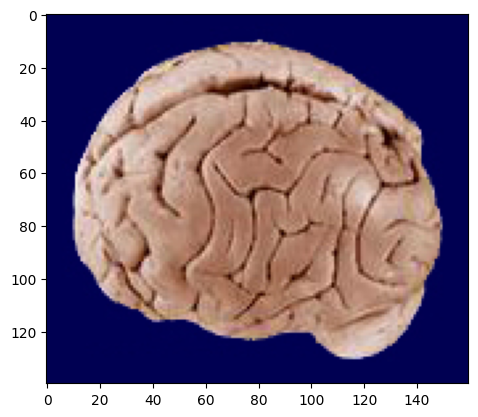

In [16]:
cropped[130:, :110] = im[0, 0]
cropped[120:, :15] = im[0, 0]
plt.imshow(cropped);
plt.imsave("brain_gorilla.ignore.png", cropped)

Crop out the Elephant image, changing the color of any remaining text to the background, and save it to a file called "brain_elephant.png":

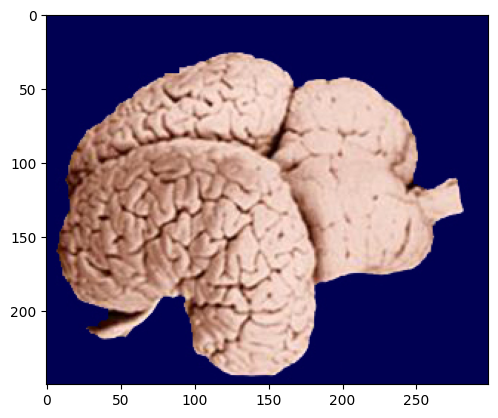

In [17]:
# Step 1: Crop the Image
cropped = im[:250, 250:].copy()
cropped[:40, :90] = im[0, 0]
cropped[220:, :70] = im[0, 0]
cropped[220:, 200:] = im[0, 0]
plt.imshow(cropped); 
plt.imsave('brain_elephant.ignore.png', cropped)

